In [115]:
import ssl
import time
import json
import urllib
import hmac, hashlib
import requests

from urllib.parse import urlparse, urlencode
from urllib.request import Request, urlopen




In [116]:
import numpy as np 
import pandas as pd 

from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras import utils 
from tensorflow.keras.optimizers import Adam, Adadelta, SGD, Adagrad, RMSprop 
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence 
from tensorflow.keras.layers import concatenate, Input, Dense, Dropout, BatchNormalization, Flatten, Conv1D, Conv2D, LSTM, GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
from tensorflow.keras.preprocessing.sequence import pad_sequences 
from tensorflow.keras.callbacks import LambdaCallback 
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.preprocessing import scale
from sklearn.preprocessing import normalize
from google.colab import files 

import random 
import math 
import os 
import csv
import re 
import matplotlib.pyplot as plt 
%matplotlib inline

from IPython.display import clear_output

In [117]:
df16 = pd.read_csv('drive/MyDrive/Нейросети/binance_data.csv', sep=',')
df18 = pd.read_csv('drive/MyDrive/Нейросети/binance2_data.csv', sep=',')

In [ ]:
#удаляем ненужные столбцы


In [118]:
delete = ['Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']
with open('drive/MyDrive/Нейросети/binance_data.csv') as infile, open('drive/MyDrive/Нейросети/binancenew_data.csv', "w", newline="") as outfile:
    r = csv.DictReader(infile)
    firstrow = next(r)  
    fields = r.fieldnames
    w = csv.DictWriter(outfile, 
                       [field for field in fields if not field in delete], 
                       extrasaction="ignore")
    w.writeheader()
    w.writerow(firstrow)
    for row in r:
        w.writerow(row)

In [119]:
delete = ['Close Time', 'Quote Asset Volume', 'Number of Trades', 'Taker Buy Base Asset Volume', 'Taker Buy Quote Asset Volume', 'Ignore']
with open('drive/MyDrive/Нейросети/binance2_data.csv') as infile, open('drive/MyDrive/Нейросети/binance2new_data.csv', "w", newline="") as outfile:
    r = csv.DictReader(infile)
    firstrow = next(r)  
    fields = r.fieldnames
    w = csv.DictWriter(outfile, 
                       [field for field in fields if not field in delete], 
                       extrasaction="ignore")
    w.writeheader()
    w.writerow(firstrow)
    for row in r:
        w.writerow(row)

In [120]:
df16 = pd.read_csv('drive/MyDrive/Нейросети/binancenew_data.csv', sep=',')
df18 = pd.read_csv('drive/MyDrive/Нейросети/binance2new_data.csv', sep=',')

In [ ]:
df16.head()

,Open Time,Open,High,Low,Close,Volume
0,2023-04-15 04:00:00,30376.13,30394.50,30337.97,30356.11,1130.26962
1,2023-04-15 05:00:00,30356.10,30434.83,30352.52,30427.05,1221.79719
2,2023-04-15 06:00:00,30427.05,30436.46,30363.23,30390.99,884.87137
3,2023-04-15 07:00:00,30390.99,30467.92,30389.35,30433.30,917.46158
4,2023-04-15 08:00:00,30433.29,30456.73,30364.70,30385.12,910.28118


In [ ]:
df16.info

<bound method DataFrame.info of                Open Time      Open      High       Low     Close      Volume
0    2023-04-15 04:00:00  30376.13  30394.50  30337.97  30356.11  1130.26962
1    2023-04-15 05:00:00  30356.10  30434.83  30352.52  30427.05  1221.79719
2    2023-04-15 06:00:00  30427.05  30436.46  30363.23  30390.99   884.87137
3    2023-04-15 07:00:00  30390.99  30467.92  30389.35  30433.30   917.46158
4    2023-04-15 08:00:00  30433.29  30456.73  30364.70  30385.12   910.28118
..                   ...       ...       ...       ...       ...         ...
995  2023-05-26 15:00:00  26760.00  26846.29  26741.61  26750.21  2715.69143
996  2023-05-26 16:00:00  26750.22  26830.00  26744.63  26792.36  1276.23413
997  2023-05-26 17:00:00  26792.35  26837.34  26686.04  26713.00  1672.57471
998  2023-05-26 18:00:00  26713.00  26757.09  26610.49  26730.69  1922.71379
999  2023-05-26 19:00:00  26730.68  26822.88  26730.68  26785.36  1084.04869

[1000 rows x 6 columns]>

In [121]:
df18.head()

,Open Time,Open,High,Low,Close,Volume
0,2023-04-19 07:00:00,0.011196,0.011237,0.011180,0.011200,2610.794
1,2023-04-19 08:00:00,0.011200,0.011336,0.011096,0.011233,16093.573
2,2023-04-19 09:00:00,0.011233,0.011265,0.011205,0.011245,2292.232
3,2023-04-19 10:00:00,0.011244,0.011263,0.011190,0.011198,2019.750
4,2023-04-19 11:00:00,0.011198,0.011199,0.011100,0.011153,2548.244


In [123]:
data16_17 = df16.iloc[:,1:]
data18_19 = df18.iloc[:,1:]

In [124]:
data16_17.head(1000)

,Open,High,Low,Close,Volume
0,30376.13,30394.50,30337.97,30356.11,1130.26962
1,30356.10,30434.83,30352.52,30427.05,1221.79719
2,30427.05,30436.46,30363.23,30390.99,884.87137
3,30390.99,30467.92,30389.35,30433.30,917.46158
4,30433.29,30456.73,30364.70,30385.12,910.28118
...,...,...,...,...,...
995,26760.00,26846.29,26741.61,26750.21,2715.69143
996,26750.22,26830.00,26744.63,26792.36,1276.23413
997,26792.35,26837.34,26686.04,26713.00,1672.57471
998,26713.00,26757.09,26610.49,26730.69,1922.71379


In [125]:
txt = df16.values[0]
txt = df18.values[0]
print(txt)

['2023-04-19 07:00:00' 0.011196 0.011237 0.01118 0.0112 2610.794]


In [126]:
data16_17.shape[0]

1000

In [127]:
# Выводим параметры одного файла
d = data18_19
print(len(d)) # Сколько есть записей
print(len(d.iloc[0])) # Длина одной строки данных
print(d.iloc[0]) # Пример первой строки данных

1000
5
Open         0.011196
High         0.011237
Low          0.011180
Close        0.011200
Volume    2610.794000
Name: 0, dtype: float64


In [128]:
# Объединяем базы из двух файлов
data = data16_17.copy()                 # Создаем копию первой базы
data = pd.concat([data16_17,data18_19]) # Присоединяем к ней вторую базу
data = np.array(data)                   # Превращаем в numpy массив

In [129]:
# Сравниваем размеры
print(len(data16_17)) # Выводим размер первой базы
print(len(data18_19)) # Выводим размер второй базы
print(len(data))      # Выводим размер суммарной базы

1000
1000
2000


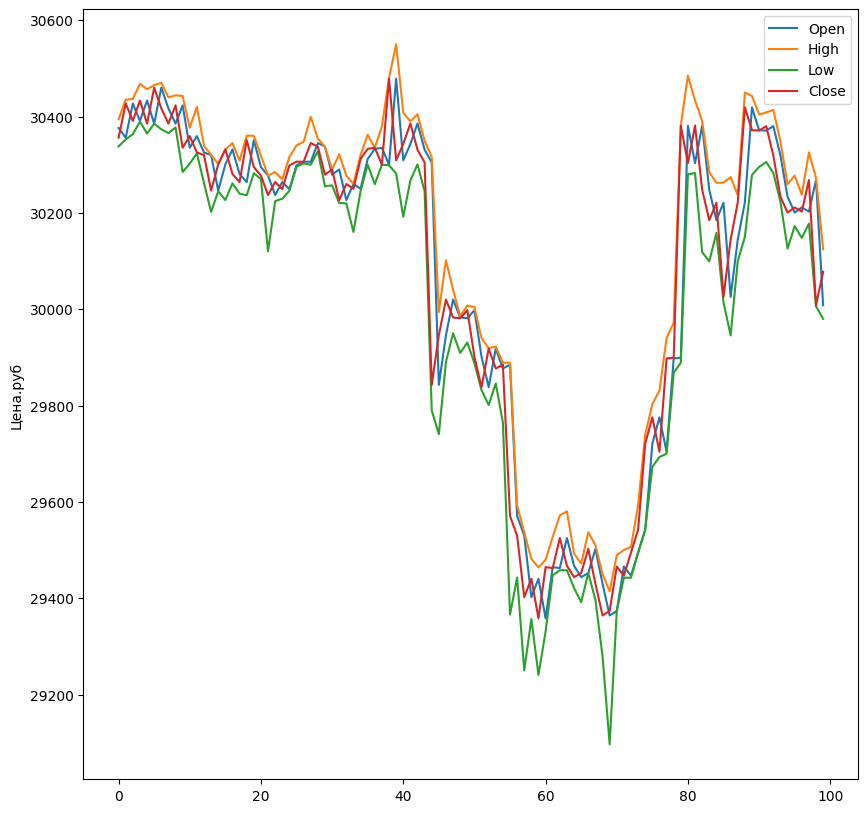

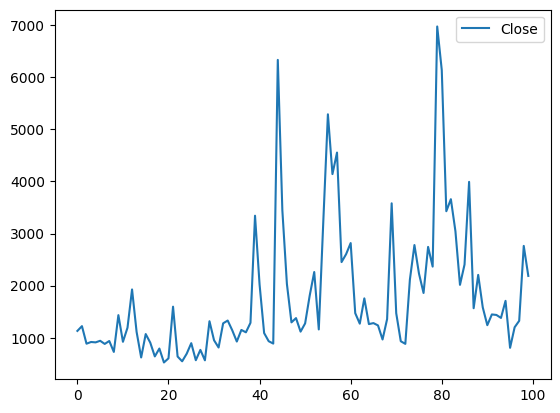

In [130]:
plt.figure(figsize=(10,10))
#Отображаем исходные от точки start и длинной stop
start = 0            #С какой точки начинаем
#stop = data.shape[0] #Сколько точек отрисуем
stop = 100 #Сколько точек отрисуем

#Заполняем текстовые названия каналов данных
chanelNames = ['Open', 'High', 'Low', 'Close', 'Volume']

#Рисуем все графики данных
#ЧЕтыре основных канала - open, max, min, close
for i in range(4):
  #Отрисовываем часть данных
  #От начальной точки, до начальной точки + размер шага отрисовки
  plt.plot(data[start:start+stop,i], 
          label=chanelNames[i])
plt.ylabel('Цена.руб')
plt.legend()
plt.show()

#Канал volume
plt.plot(data[start:start+stop,4], label='Close') 
plt.legend()
plt.show()

In [ ]:
#LSTM

In [142]:

scaler = MinMaxScaler()

close_price = df16.Close.values.reshape(-1, 1)

scaled_close = scaler.fit_transform(close_price)

In [132]:
scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

In [133]:
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test


X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

In [134]:
DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = Sequential()

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=True),
  input_shape=(WINDOW_SIZE, X_train.shape[-1])
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM((WINDOW_SIZE * 2), return_sequences=True)
))
model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(
  LSTM(WINDOW_SIZE, return_sequences=False)
))

model.add(Dense(units=1))

model.add(Activation('linear'))

In [143]:
BATCH_SIZE = 128

model.compile(
    loss='mean_squared_error',
    optimizer='adam'
)

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

Epoch 1/100
7/7 [==============================] - 37s 3s/step - loss: 0.0085 - val_loss: 0.0017
Epoch 2/100
7/7 [==============================] - 19s 3s/step - loss: 0.0059 - val_loss: 0.0013
Epoch 3/100
7/7 [==============================] - 19s 3s/step - loss: 0.0036 - val_loss: 9.2365e-04
Epoch 4/100
7/7 [==============================] - 17s 3s/step - loss: 0.0090 - val_loss: 0.0044
Epoch 5/100
7/7 [==============================] - 20s 3s/step - loss: 0.0061 - val_loss: 0.0025
Epoch 6/100
7/7 [==============================] - 19s 3s/step - loss: 0.0060 - val_loss: 0.0029
Epoch 7/100
7/7 [==============================] - 18s 3s/step - loss: 0.0057 - val_loss: 0.0028
Epoch 8/100
7/7 [==============================] - 18s 3s/step - loss: 0.0066 - val_loss: 0.0036
Epoch 9/100
7/7 [==============================] - 20s 3s/step - loss: 0.0067 - val_loss: 0.0025
Epoch 10/100
7/7 [==============================] - 18s 3s/step - loss: 0.0107 - val_loss: 0.0047
Epoch 11/100
7/7 [=======

In [144]:
y_hat = model.predict(X_test)

2/2 [==============================] - 6s 185ms/step


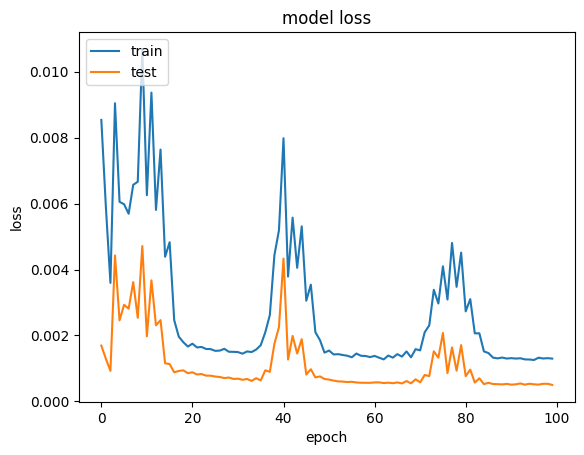

In [145]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

In [147]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 400ms/step - loss: 5.6164e-04


0.0005616427515633404

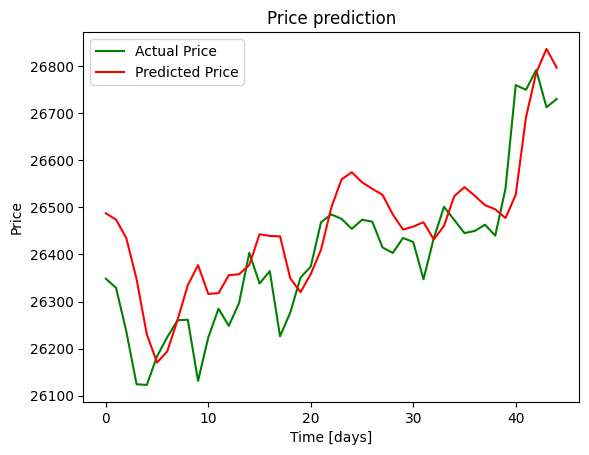

In [148]:
plt.plot(y_test_inverse, label="Actual Price", color='green')
plt.plot(y_hat_inverse, label="Predicted Price", color='red')
 
plt.title('Price prediction')
plt.xlabel('Time [days]')
plt.ylabel('Price')
plt.legend(loc='best')
 
plt.show();